In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

meds = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

clinical_df.head()
# Combine the data into a single dataset
df = pd.DataFrame.merge(mouse_df, clinical_df, on='Mouse ID')
# Display the data table for preview

df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
group_df = pd.DataFrame(grouped)
group_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
tumor_gd = group_df.unstack().transpose()
tumor_gd = tumor_gd.reset_index(level=0, drop=True)
se = tumor_gd.sem()
s_error = [se[0], se[2], se[3], se[4]]
se

Drug
Capomulin    0.970903
Ceftamin     2.047757
Infubinol    2.205969
Ketapril     2.671728
Naftisol     2.616691
Placebo      2.479069
Propriva     2.220042
Ramicane     1.031031
Stelasyn     2.489156
Zoniferol    2.217328
dtype: float64

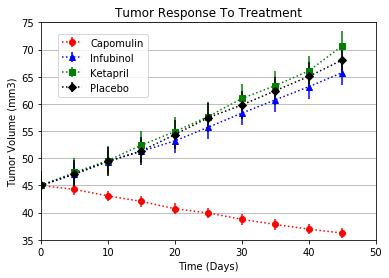

<Figure size 1440x1080 with 0 Axes>

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

c = ax1.errorbar(tumor_gd.index, tumor_gd['Capomulin'], c='r', linestyle='dotted', marker='o', yerr=s_error[0])
i = ax1.errorbar(tumor_gd.index, tumor_gd['Infubinol'], c='blue', linestyle='dotted', marker='^', yerr=s_error[1])
k = ax1.errorbar(tumor_gd.index, tumor_gd['Ketapril'], c='g', linestyle='dotted', marker='s', yerr=s_error[2])
p = ax1.errorbar(tumor_gd.index, tumor_gd['Placebo'], c='black', linestyle='dotted', marker='D', yerr=s_error[3])
plt.xlim(0, 50)
plt.ylim(35, 75)
plt.gca().yaxis.grid(True)
plt.title('Tumor Response To Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.figure(figsize=(20,15))
fig.legend([c, i, k, p], meds, loc=[.15, .65])
plt.show()

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
grouped = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
group_df = pd.DataFrame(grouped)
group_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
m_gd = group_df.unstack().transpose()
m_gd = m_gd.reset_index(level=0, drop=True)
se = m_gd.sem()
s_error = [se[0], se[2], se[3], se[4]]
se

Drug
Capomulin    0.165941
Ceftamin     0.286729
Infubinol    0.228098
Ketapril     0.349180
Naftisol     0.298297
Placebo      0.357688
Propriva     0.306641
Ramicane     0.136458
Stelasyn     0.190307
Zoniferol    0.341369
dtype: float64

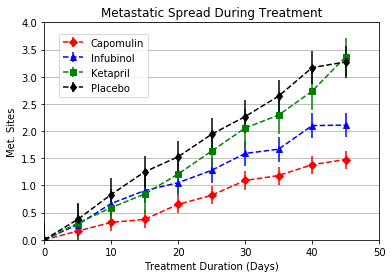

<Figure size 1440x1080 with 0 Axes>

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

c = ax1.errorbar(m_gd.index, m_gd['Capomulin'], c='r', linestyle='dashed', marker='D', yerr=s_error[0])
i = ax1.errorbar(m_gd.index, m_gd['Infubinol'], c='blue', linestyle='dashed', marker='^', yerr=s_error[1])
k = ax1.errorbar(m_gd.index, m_gd['Ketapril'], c='g', linestyle='dashed', marker='s', yerr=s_error[2])
p = ax1.errorbar(m_gd.index, m_gd['Placebo'], c='black', linestyle='dashed', marker='d', yerr=s_error[3])
plt.xlim(0, 50)
plt.ylim(0, 4)
plt.gca().yaxis.grid(True)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.figure(figsize=(20,15))
fig.legend([c, i, k, p], meds, loc=[.15, .65])
plt.show()

## Survival Rates

In [8]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
grouped = df.groupby(['Drug', 'Timepoint'])['Mouse ID'].nunique()
group_df = pd.DataFrame(grouped)
group_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [9]:
s_gd = group_df.unstack().transpose()
s_gd = s_gd.reset_index(level=0, drop=True)
s_gd

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


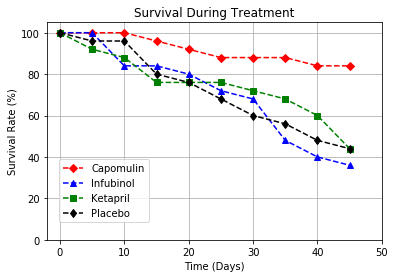

<Figure size 1440x1080 with 0 Axes>

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

c = ax1.errorbar(s_gd.index, s_gd['Capomulin']/25 * 100, c='r', linestyle='dashed', marker='D')
i = ax1.errorbar(s_gd.index, s_gd['Infubinol']/25 * 100, c='blue', linestyle='dashed', marker='^')
k = ax1.errorbar(s_gd.index, s_gd['Ketapril']/25 * 100, c='g', linestyle='dashed', marker='s')
p = ax1.errorbar(s_gd.index, s_gd['Placebo']/25 * 100, c='black', linestyle='dashed', marker='d')
plt.xlim(-2, 50)
plt.ylim(0, 105)
plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.figure(figsize=(20,15))
fig.legend([c, i, k, p], meds, loc=[.15, .2])
plt.show()

## Summary Bar Graph

In [11]:
# Calculate the percent changes for each drug

# Display the data to confirm
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
change = []
for drug in drugs:
    per_change = round((tumor_gd[drug].iloc[-1] - tumor_gd[drug].iloc[0])/tumor_gd[drug].iloc[0] * 100, 2)
    change.append(per_change)
    
change

[-19.48, 46.12, 57.03, 51.3]

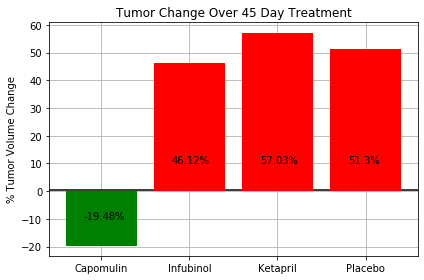

In [12]:
b = plt.bar(drugs, change, width=.8, zorder=3, color='r')
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid(zorder=1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.tight_layout()
plt.text(-.2, -10, f'{change[0]}%')
plt.text(.8, 10, f'{change[1]}%')
plt.text(1.8, 10, f'{change[2]}%')
plt.text(2.8, 10, f'{change[3]}%')
b[0].set_color('g')